In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le dataset SAVEE
dataset_path = '../all_audio_files/'  # Remplacez par le chemin réel du dataset SAVEE
output_dir = '../audio_representations/audio_representations_savee/'  # Remplacez par le répertoire de sortie

# Créer les dossiers pour les représentations
spectrograms_dir = os.path.join(output_dir, 'spectrograms')
mfcc_dir = os.path.join(output_dir, 'MFCCs')
os.makedirs(spectrograms_dir, exist_ok=True)
os.makedirs(mfcc_dir, exist_ok=True)

# Mapper les émotions SAVEE vers les codes numériques
emotion_mapping = {
    "n": "01",  # Neutral
    "h": "03",  # Happy
    "sa": "04",  # Sad
    "a": "05",  # Angry
    "f": "06",  # Fearful
    "d": "07",  # Disgust
    "su": "08",  # Surprised
}

# Fonction pour générer des spectrogrammes
def generate_spectrogram(y, sr, output_file):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

# Fonction pour générer des MFCCs
def generate_mfcc(y, sr, output_file, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

# Fonction pour générer un nom de fichier unique
def generate_unique_filename(base_path, base_name, extension):
    counter = 1
    file_path = os.path.join(base_path, f"{base_name}_{counter:03d}.{extension}")
    while os.path.exists(file_path):
        counter += 1
        file_path = os.path.join(base_path, f"{base_name}_{counter:03d}.{extension}")
    return file_path

# Charger et traiter les fichiers audio
for file in os.listdir(dataset_path):
    if file.endswith('.wav'):  # Vérifie si c'est un fichier audio
        file_path = os.path.join(dataset_path, file)
        
        # Charger l'audio
        y, sr = librosa.load(file_path, sr=None)
        
        # Extraire l'émotion du nom du fichier (par exemple, 'a01_DC.wav' -> 'a' pour Angry)
        emotion_code = file.split('_')[0][:1]  # Prendre uniquement le premier caractère
        
        # Mapper l'émotion vers son code numérique
        base_filename = f"02-01-{emotion_mapping.get(emotion_code, '00')}-01-01-01-01"
        
        spectrogram_output = generate_unique_filename(spectrograms_dir, base_filename, "png")
        mfcc_output = generate_unique_filename(mfcc_dir, base_filename, "png")
        
        # Générer et sauvegarder les représentations
        generate_spectrogram(y, sr, spectrogram_output)
        generate_mfcc(y, sr, mfcc_output)
        
        print(f"Représentations générées pour {file}:")
        print(f"  - Spectrogramme: {spectrogram_output}")
        print(f"  - MFCCs: {mfcc_output}")

Représentations générées pour a01_DC.wav:
  - Spectrogramme: ../audio_representations/audio_representations_savee/spectrograms\02-01-05-01-01-01-01_001.png
  - MFCCs: ../audio_representations/audio_representations_savee/MFCCs\02-01-05-01-01-01-01_001.png
Représentations générées pour a01_JE.wav:
  - Spectrogramme: ../audio_representations/audio_representations_savee/spectrograms\02-01-05-01-01-01-01_002.png
  - MFCCs: ../audio_representations/audio_representations_savee/MFCCs\02-01-05-01-01-01-01_002.png
Représentations générées pour a01_JK.wav:
  - Spectrogramme: ../audio_representations/audio_representations_savee/spectrograms\02-01-05-01-01-01-01_003.png
  - MFCCs: ../audio_representations/audio_representations_savee/MFCCs\02-01-05-01-01-01-01_003.png
Représentations générées pour a01_KL.wav:
  - Spectrogramme: ../audio_representations/audio_representations_savee/spectrograms\02-01-05-01-01-01-01_004.png
  - MFCCs: ../audio_representations/audio_representations_savee/MFCCs\02-01-05-

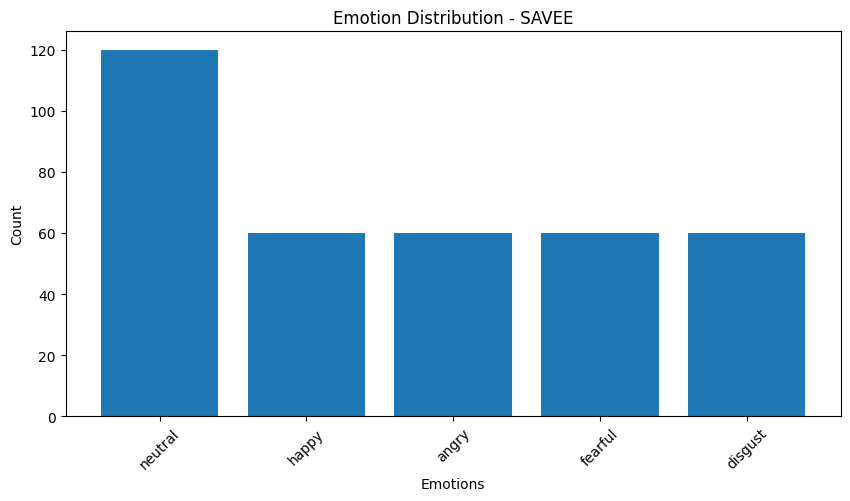

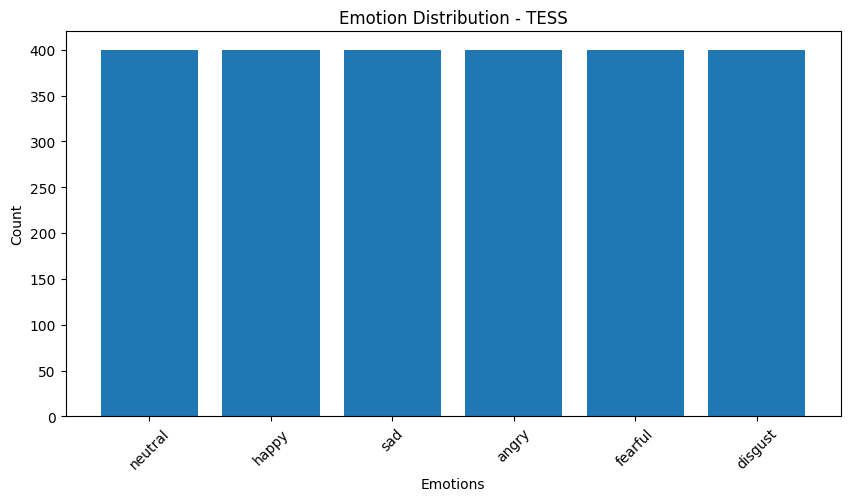

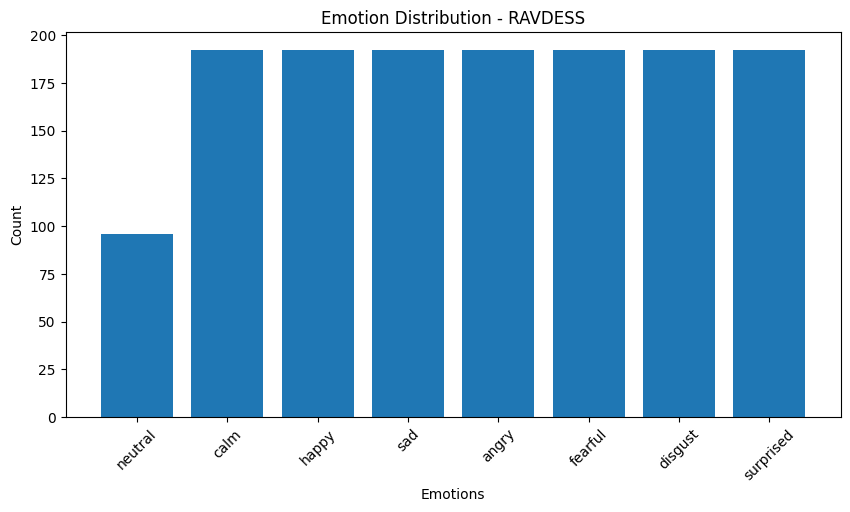

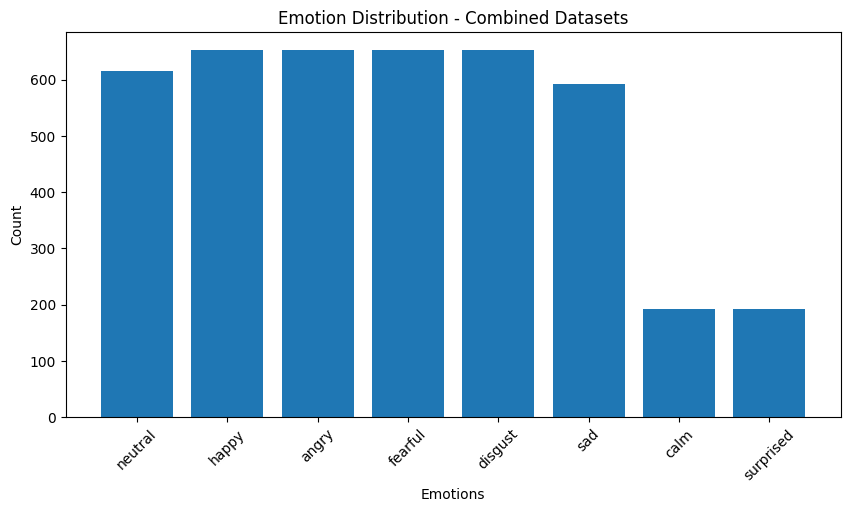

In [3]:
#!/usr/bin/env python3

import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# ==========================
# DATA LOADING AND PREPROCESSING
# ==========================
dataset_dirs = {
    "../audio_representations/audio_representations_savee/spectrograms/": "SAVEE",
    "../audio_representations/audio_representations_Tess/spectrograms/": "TESS",
    "../audio_representations/audio_representations_ravdess/spectrograms/": "RAVDESS"
}

# Dictionnaire pour mapper les codes d'émotion à des labels
emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Fonction pour extraire les émotions des noms de fichiers
def extract_emotions(dataset_dir):
    emotions = []
    for file_name in os.listdir(dataset_dir):
        if file_name.endswith(".png"):
            try:
                emotion_code = file_name.split("-")[2]
                emotion = emotion_labels.get(emotion_code, "unknown")
                emotions.append(emotion)
            except IndexError:
                print(f"Nom de fichier invalide : {file_name}")
    return emotions

# Extraire les émotions pour chaque dataset
dataset_emotions = {}
for dataset_dir, dataset_name in dataset_dirs.items():
    emotions = extract_emotions(dataset_dir)
    dataset_emotions[dataset_name] = emotions

# Fonction pour tracer la répartition des émotions
def plot_emotion_distribution(emotions, title):
    emotion_counts = Counter(emotions)
    labels, values = zip(*emotion_counts.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel("Emotions")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Tracer la répartition des émotions pour chaque dataset
for dataset_name, emotions in dataset_emotions.items():
    plot_emotion_distribution(emotions, f"Emotion Distribution - {dataset_name}")

# Tracer la répartition des émotions pour l'ensemble combiné
all_emotions = [emotion for emotions in dataset_emotions.values() for emotion in emotions]
plot_emotion_distribution(all_emotions, "Emotion Distribution - Combined Datasets")

In [2]:
import shutil
import os

# Chemin vers le dossier contenant les sous-dossiers avec les fichiers audio
audio_data_path = '../audiodata'  # Remplacez par le chemin réel du dossier contenant les sous-dossiers
output_dir = '../all_audio_files/'  # Dossier de sortie pour tous les fichiers audio

# Créer le dossier de sortie s'il n'existe pas
os.makedirs(output_dir, exist_ok=True)

# Parcourir tous les sous-dossiers et fichiers
for root, dirs, files in os.walk(audio_data_path):
    for file in files:
        if file.endswith('.wav'):  # Vérifie si c'est un fichier audio
            # Chemin complet du fichier source
            source_file_path = os.path.join(root, file)
            
            # Extraire l'ID du dossier parent
            folder_id = os.path.basename(root)
            
            # Nouveau nom de fichier avec l'ID du dossier ajouté à la fin
            new_file_name = f"{os.path.splitext(file)[0]}_{folder_id}.wav"
            
            # Chemin complet du fichier de destination
            destination_file_path = os.path.join(output_dir, new_file_name)
            
            # Copier le fichier vers le dossier de sortie
            shutil.copy2(source_file_path, destination_file_path)
            
            print(f"Fichier {file} copié vers {destination_file_path}")

Fichier a01.wav copié vers ../all_audio_files/a01_DC.wav
Fichier a02.wav copié vers ../all_audio_files/a02_DC.wav
Fichier a03.wav copié vers ../all_audio_files/a03_DC.wav
Fichier a04.wav copié vers ../all_audio_files/a04_DC.wav
Fichier a05.wav copié vers ../all_audio_files/a05_DC.wav
Fichier a06.wav copié vers ../all_audio_files/a06_DC.wav
Fichier a07.wav copié vers ../all_audio_files/a07_DC.wav
Fichier a08.wav copié vers ../all_audio_files/a08_DC.wav
Fichier a09.wav copié vers ../all_audio_files/a09_DC.wav
Fichier a10.wav copié vers ../all_audio_files/a10_DC.wav
Fichier a11.wav copié vers ../all_audio_files/a11_DC.wav
Fichier a12.wav copié vers ../all_audio_files/a12_DC.wav
Fichier a13.wav copié vers ../all_audio_files/a13_DC.wav
Fichier a14.wav copié vers ../all_audio_files/a14_DC.wav
Fichier a15.wav copié vers ../all_audio_files/a15_DC.wav
Fichier d01.wav copié vers ../all_audio_files/d01_DC.wav
Fichier d02.wav copié vers ../all_audio_files/d02_DC.wav
Fichier d03.wav copié vers ../a